In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as se 
import sklearn as sk 
import pandas_profiling as pf
import os 
import statsmodels.formula.api as smf
% matplotlib inline 
plt.rcParams["figure.figsize"]=10,7.5
plt.rcParams["axes.grid"]=True
plt.gray()

from sklearn.cross_validation import train_test_split
import scipy.stats as stat
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [1]:
import os

In [7]:
os.chdir('G:\\EIP Classes\\analytics\\AnalytixLabs-Bangalore_Moin\\CREDIT CARD SPEND PREDICTION- BANKING-REGRESSION')

In [8]:
credit=pd.read_csv("CREDIT CARD USERS DATA.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [7]:
credit.describe()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,1.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,2.0000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,3.0000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,4.0000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,5.0000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#var_report=pf.ProfileReport(credit)

In [ ]:
#var_report

## Data Preprocessing:-

In [8]:
# Seperating numerical variable:-

num_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ["int32","float32","int32","float64"]]

In [9]:
num_var_names

['region',
 'gender',
 'age',
 'agecat',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'othdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'carditems',
 'cardspent',
 'card2items',
 'card2spen

In [10]:
num_var=credit[num_var_names]

In [11]:
num_var.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 115 entries, region to response_03
dtypes: float64(115)
memory usage: 4.4 MB


In [13]:
# defining function for data audit report:-

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [14]:
summ=num_var.apply(var_summary).T

In [15]:
#summ.to_csv("summary.csv")

## Outliers Treatment:-

In [16]:
# outliers treatment:-

def outliers_treat(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x

In [17]:
num_var=num_var.apply(outliers_treat)

In [18]:
num_var.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.000,3.001400,3.00,1.421760,2.021402,1.00,1.00,1.00,1.00,2.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000
gender,5000.0,0.0,2518.000,0.503600,1.00,0.500037,0.250037,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.000,1.0000,1.000000,1.0000
age,5000.0,0.0,235128.000,47.025600,47.00,17.770338,315.784902,18.00,18.00,20.00,23.00,31.00,47.00,62.0000,72.000,76.0000,79.000000,79.0000
agecat,5000.0,0.0,21194.000,4.238800,4.00,1.308785,1.712917,2.00,2.00,2.00,2.00,3.00,4.00,5.0000,6.000,6.0000,6.000000,6.0000
ed,5000.0,0.0,72721.000,14.544200,14.00,3.242553,10.514149,8.00,8.00,9.00,10.00,12.00,14.00,17.0000,19.000,20.0000,21.000000,21.0000
edcat,5000.0,0.0,13360.000,2.672000,2.00,1.211738,1.468310,1.00,1.00,1.00,1.00,2.00,2.00,4.0000,4.000,5.0000,5.000000,5.0000
jobcat,5000.0,0.0,13764.000,2.752800,2.00,1.737900,3.020296,1.00,1.00,1.00,1.00,1.00,2.00,4.0000,6.000,6.0000,6.000000,6.0000
union,5000.0,0.0,756.000,0.151200,0.00,0.358280,0.128364,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.000,1.0000,1.000000,1.0000
employ,5000.0,0.0,48490.000,9.698000,7.00,9.581689,91.808758,0.00,0.00,0.00,0.00,2.00,7.00,15.0000,25.000,31.0000,39.000000,39.0000
empcat,5000.0,0.0,14663.000,2.932600,3.00,1.453300,2.112080,1.00,1.00,1.00,1.00,2.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000


In [19]:
num_var.isnull().any()

region           False
gender           False
age              False
agecat           False
ed               False
edcat            False
jobcat           False
union            False
employ           False
empcat           False
retire           False
income           False
lninc            False
inccat           False
debtinc          False
creddebt         False
othdebt          False
default          False
jobsat           False
marital          False
spoused          False
spousedcat       False
reside           False
pets             False
pets_cats        False
pets_dogs        False
pets_birds       False
pets_reptiles    False
pets_small       False
pets_saltfish    False
                 ...  
equipmon         False
equipten         False
callcard         False
cardmon          False
wireless         False
wiremon          False
wireten          False
multline         False
voice            False
pager            False
internet         False
callid           False
callwait   

In [20]:
# Finding correlation matrix for numeric data:-

corr=num_var.corr()

In [21]:
corr

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
region,1.000000,-0.012810,-0.026525,-0.018455,0.013850,0.015710,-0.004717,-0.013768,-0.010204,-0.009345,...,0.048589,0.040228,0.020596,0.007504,0.026391,0.036622,0.012312,-0.013004,0.005899,0.005694
gender,-0.012810,1.000000,-0.010186,-0.007427,-0.000777,-0.002673,-0.016470,0.000311,-0.011756,-0.013842,...,-0.002861,-0.001116,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685
age,-0.026525,-0.010186,1.000000,0.969879,-0.093966,-0.081129,0.037709,0.011206,0.705515,0.739573,...,0.055100,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231
agecat,-0.018455,-0.007427,0.969879,1.000000,-0.078331,-0.064124,0.032554,0.004465,0.679902,0.732246,...,0.078888,-0.059490,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860
ed,0.013850,-0.000777,-0.093966,-0.078331,1.000000,0.966489,-0.072855,0.000273,-0.214669,-0.197841,...,0.053674,0.300016,0.435623,0.369831,0.377019,0.276163,-0.073510,-0.117333,0.073750,0.107912
edcat,0.015710,-0.002673,-0.081129,-0.064124,0.966489,1.000000,-0.069002,-0.003240,-0.199709,-0.185672,...,0.056563,0.293125,0.414619,0.357481,0.361191,0.273646,-0.068420,-0.112653,0.070172,0.106223
jobcat,-0.004717,-0.016470,0.037709,0.032554,-0.072855,-0.069002,1.000000,0.084778,0.416234,0.346723,...,0.022038,-0.009352,-0.037929,-0.026888,-0.050278,0.008409,0.090861,0.000137,0.002888,-0.008415
union,-0.013768,0.000311,0.011206,0.004465,0.000273,-0.003240,0.084778,1.000000,0.035272,0.028028,...,0.006251,0.019565,0.006489,-0.005895,0.006765,0.024516,0.007508,-0.010492,0.006431,0.004479
employ,-0.010204,-0.011756,0.705515,0.679902,-0.214669,-0.199709,0.416234,0.035272,1.000000,0.903591,...,0.107435,-0.069775,-0.162028,-0.198838,-0.218677,-0.040587,0.368778,0.039085,0.014410,-0.029312
empcat,-0.009345,-0.013842,0.739573,0.732246,-0.197841,-0.185672,0.346723,0.028028,0.903591,1.000000,...,0.138173,-0.054010,-0.152394,-0.192716,-0.211118,-0.035826,0.369206,0.030418,0.017504,-0.032850


In [28]:
num_var["Total_spend"]=num_var["cardspent"]+num_var["card2spent"]

KeyError: 'cardspent'

In [ ]:
num_var=num_var.drop(columns=["cardspent","card2spent"])

In [29]:
import seaborn as sns

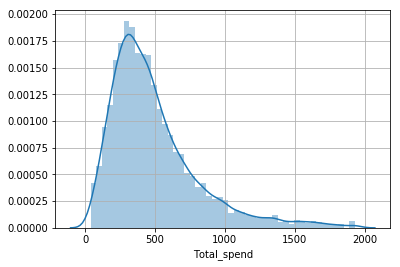

In [30]:
# checking normality of Total_spend:-

sns.distplot(num_var["Total_spend"])

Total spend variable not follw the normal distribution. we can transform total spend into normal format by using log transformation.

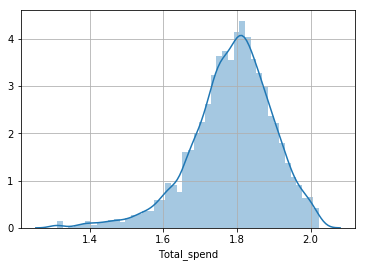

In [33]:
sns.distplot(np.log(num_var["Total_spend"]))

In [34]:
num_var["Total_spend"]=np.log(num_var["Total_spend"])

In [35]:
num_var.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_spend
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.610843
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.470358
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.772580
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.772316
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.829400


## Variable Reduction

In [36]:
from sklearn.preprocessing import StandardScaler 

In [37]:
# Standarizing dataset:-

sc=StandardScaler().fit(num_var)

In [38]:
credit_scaled=sc.fit_transform(num_var)

In [39]:
pd.DataFrame(credit_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,-1.407832,0.992826,-1.520979,-1.710766,0.140582,0.270713,-1.008674,2.369337,-1.012240,-1.329935,...,-0.501562,-1.31275,1.042502,1.051737,-0.466616,-0.946622,-0.302037,2.589239,-0.338128,-1.575055
1,1.405863,-1.007226,-1.408420,-1.710766,0.757442,1.096056,-0.433210,-0.422059,-1.012240,-1.329935,...,1.993771,0.76176,1.042502,1.051737,2.143091,1.056387,-0.302037,-0.386214,-0.338128,-2.836026
2,-0.000985,0.992826,1.124143,1.345811,-0.167848,-0.554631,-0.433210,-0.422059,0.657779,1.422698,...,-0.501562,-1.31275,-0.959230,-0.950808,-0.466616,1.056387,-0.302037,-0.386214,-0.338128,-0.123319
3,0.702439,-1.007226,-1.352141,-1.710766,0.449012,0.270713,-0.433210,-0.422059,-1.012240,-1.329935,...,-0.501562,0.76176,1.042502,1.051737,-0.466616,1.056387,3.310849,-0.386214,-0.338128,-0.125693
4,-0.704409,-1.007226,-1.183304,-0.946622,0.449012,0.270713,-0.433210,-0.422059,-0.907864,-1.329935,...,-0.501562,0.76176,-0.959230,1.051737,-0.466616,-0.946622,-0.302037,2.589239,-0.338128,0.386688


### Variable Reduction By using PCA:-

In [40]:
# Appliying principle component analysis for data reduction:-


from sklearn.decomposition import PCA

In [41]:
pc=PCA(n_components=114).fit(credit_scaled)

In [42]:
# Variance ratio:-

variance_ratio=pc.explained_variance_ratio_

In [43]:
variance_ratio

array([1.13128495e-01, 8.55337383e-02, 4.63172856e-02, 4.20567279e-02,
       3.28115284e-02, 3.15030357e-02, 1.99028158e-02, 1.76315136e-02,
       1.63706634e-02, 1.58813387e-02, 1.50294357e-02, 1.33576097e-02,
       1.24139806e-02, 1.16417987e-02, 1.15858463e-02, 1.12649696e-02,
       1.05262133e-02, 1.02156256e-02, 1.00492883e-02, 9.96876397e-03,
       9.91860800e-03, 9.78207667e-03, 9.62511079e-03, 9.60981182e-03,
       9.56133788e-03, 9.34797699e-03, 9.30538695e-03, 9.26207111e-03,
       9.18607438e-03, 9.11215812e-03, 9.07010485e-03, 8.96717592e-03,
       8.93654056e-03, 8.84868875e-03, 8.76194744e-03, 8.72005371e-03,
       8.56157490e-03, 8.49129695e-03, 8.47404978e-03, 8.42785070e-03,
       8.35123607e-03, 8.27289567e-03, 8.24882811e-03, 8.17609204e-03,
       8.08156824e-03, 8.02285404e-03, 7.95379143e-03, 7.82391079e-03,
       7.78486115e-03, 7.75002825e-03, 7.60826933e-03, 7.56590930e-03,
       7.43576841e-03, 7.24422422e-03, 7.02997922e-03, 6.96941824e-03,
      

In [44]:
# variance pct:-

var_pct=np.cumsum(np.round(pc.explained_variance_ratio_,decimals=4)*100)

In [45]:
pd.DataFrame(var_pct).head(55)

,0
0,11.31
1,19.86
2,24.49
3,28.70
4,31.98
5,35.13
6,37.12
7,38.88
8,40.52
9,42.11


In [46]:
pc_final=PCA(n_components=52).fit(credit_scaled)

In [47]:
credit_final=pc_final.fit_transform(credit_scaled)

In [48]:
pd.DataFrame(credit_final).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-4.763296,2.111229,1.447618,-1.851574,-0.555251,1.382122,1.308367,-0.232770,-0.612294,2.142419,...,-0.935145,-0.069355,-1.428287,1.057942,-1.469353,-0.558242,0.400247,0.176402,0.711358,-1.930033
1,-3.717055,5.447334,1.982912,1.943443,2.722408,0.332200,-1.975882,1.339952,0.040917,4.114651,...,0.213484,-0.087806,-0.799547,0.986119,1.884798,-1.014772,-1.390224,0.202323,-0.252974,0.232411
2,3.649589,-4.180368,0.228677,1.398367,-0.207702,-2.179172,-0.024807,0.004717,-0.476096,-0.511609,...,1.074978,0.053647,0.383923,-0.158272,0.505427,0.082141,-0.773596,-1.860472,0.545734,0.820514
3,-4.166666,-0.249646,-0.512936,1.462629,0.129352,-4.455796,-1.552107,-1.287501,0.855140,1.081530,...,-1.098758,0.112497,1.206327,1.035587,0.833399,0.146765,1.450630,0.406604,0.431792,-0.042393
4,-3.192391,1.791523,2.099002,-2.347648,-1.887447,-1.800757,-0.669886,-0.892624,-1.844586,-0.525180,...,-1.384529,1.212308,-0.255851,-1.037045,-1.671760,-0.767093,-0.271273,-0.687996,0.020536,-0.308824


In [44]:
factor_loadings=pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=num_var.columns).T

In [45]:
factor_loadings

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
region,0.018284,0.052086,-0.010473,-0.001185,-0.083266,-0.057067,0.010106,-0.013332,-0.137428,0.049303,...,0.019369,0.147331,0.092730,0.133226,0.099373,0.135690,-0.190495,0.011171,0.136822,0.169515
gender,-0.020532,-0.009848,-0.014707,0.013295,0.017857,-0.019263,-0.003535,0.065341,-0.047094,0.043378,...,-0.065895,0.117559,-0.119311,-0.270131,-0.121398,0.002806,-0.069638,-0.123848,0.029815,-0.020052
age,0.761007,-0.289281,0.141256,0.119758,0.149332,0.178972,0.183362,-0.019289,-0.071681,-0.216713,...,-0.016335,-0.011222,-0.011141,-0.011312,-0.022522,-0.014633,0.001723,0.030096,-0.009092,-0.003999
agecat,0.760551,-0.262518,0.107280,0.118693,0.123733,0.179756,0.171185,-0.020264,-0.077553,-0.235244,...,-0.005475,-0.011829,-0.001067,-0.016014,-0.022048,-0.018335,0.002916,0.035934,-0.006928,-0.002418
ed,-0.029717,0.572300,-0.017255,0.410278,-0.046102,0.012658,0.094622,0.020823,-0.018017,-0.076630,...,-0.104152,0.101668,-0.049426,0.003667,0.009843,0.093862,0.049970,-0.016210,0.044197,-0.016240
edcat,-0.018307,0.560653,-0.016227,0.403176,-0.045503,0.017341,0.092277,0.020095,-0.022652,-0.081360,...,-0.108751,0.098135,-0.044543,0.009617,0.008486,0.101483,0.049228,-0.016775,0.052344,-0.018398
jobcat,0.192635,-0.060379,-0.011130,-0.025964,0.037256,0.030210,0.062553,0.016902,0.060143,0.059529,...,0.006304,0.054557,0.052283,-0.012603,0.075125,0.054286,0.039591,-0.057031,0.114216,-0.083225
union,0.023054,0.023062,0.018891,-0.010603,0.009117,0.008968,-0.007655,0.037000,0.059334,-0.052889,...,-0.095509,-0.159991,-0.160639,0.288706,0.041020,0.151748,-0.113030,0.182544,-0.185408,-0.050955
employ,0.745571,-0.258044,0.008676,0.011125,0.050632,0.174745,0.137079,-0.007725,0.001589,-0.090267,...,0.009751,0.018918,0.012613,-0.012668,0.021700,-0.029872,0.028204,-0.024164,0.021221,0.000549
empcat,0.783336,-0.234416,-0.028475,0.020391,0.025875,0.179883,0.130065,-0.008217,-0.033605,-0.140065,...,0.034570,0.000011,0.021298,-0.024792,0.001083,-0.020311,0.005090,-0.000251,0.016125,0.008631


In [46]:
# factor_loadings.to_csv("factor_load.csv")

In [47]:
# Variable selection:-

col_factor=["carditems","region","card2","jobcat","debtinc","pets","Total_spend","spousedcat","marital","carditems","region","pets","Total_spend","spousedcat","marital","carditems","region","card2","commutecat","carvalue","cardtenure","wiremon"]

### Variable Reduction By Using Random Forest Feature Importance:-

In [49]:
# variable reduction using random forest:-

from sklearn.ensemble import RandomForestRegressor

In [50]:
features=num_var.columns.difference(["Total_spend"])

In [51]:
train_x,test_x,train_y,test_y=train_test_split(num_var[features],num_var["Total_spend"],test_size=0.3,random_state=42)

In [52]:
train_y.head()

1840    1.748728
2115    1.892898
4437    1.807267
1146    1.639445
2486    1.685748
Name: Total_spend, dtype: float64

In [53]:
rf_model=RandomForestRegressor(n_estimators=100).fit(train_x,train_y)

In [54]:
rf_model.feature_importances_

array([1.43435340e-03, 6.15521806e-03, 1.05558297e-03, 7.06441299e-03,
       9.69327617e-04, 2.47816125e-03, 4.64146154e-04, 1.00401889e-03,
       1.06751705e-03, 1.18164727e-03, 1.20376699e-03, 7.16524245e-04,
       6.83456317e-02, 1.65718813e-02, 3.28511878e-03, 1.00503874e-03,
       2.83577186e-01, 3.51145936e-03, 6.83464105e-04, 3.58090543e-03,
       3.26837506e-03, 1.27190463e-03, 2.70723416e-01, 8.65569258e-03,
       3.91766971e-03, 6.88001084e-04, 3.27186226e-03, 1.07794039e-03,
       3.15058792e-03, 1.15362057e-03, 2.12209349e-02, 7.66754710e-04,
       2.72066395e-03, 9.77434421e-04, 1.34788114e-03, 7.97569667e-04,
       1.15631428e-03, 1.19585761e-03, 1.02788520e-03, 6.12972610e-04,
       8.15792686e-04, 1.16777082e-03, 1.45803949e-03, 9.47185600e-04,
       1.26030641e-02, 9.17977485e-03, 7.52428055e-04, 7.31634586e-04,
       5.54534635e-03, 1.72287619e-03, 1.14457478e-03, 4.85987946e-03,
       2.25252062e-04, 3.47275518e-03, 3.06385239e-03, 7.84828981e-04,
      

In [55]:
feature_imp=pd.DataFrame({"var":train_x.columns,"importance":rf_model.feature_importances_}).sort_values(["importance"],ascending=False)

In [57]:
feature_imp.reset_index(drop=True)

,importance,var
0,0.283577,card2items
1,0.270723,carditems
2,0.068346,card
3,0.053114,income
4,0.042900,lninc
5,0.021221,carvalue
6,0.016572,card2
7,0.012603,creddebt
8,0.011543,othdebt
9,0.010182,hourstv


In [56]:
feature_imp.var

<bound method DataFrame.var of      importance              var
16     0.266149       card2items
22     0.245666        carditems
12     0.078671             card
65     0.057652            lninc
61     0.048109           income
13     0.020638            card2
30     0.019929         carvalue
44     0.013528         creddebt
71     0.012903          othdebt
59     0.010319          hourstv
45     0.010277          debtinc
23     0.009629          cardmon
3      0.008053              age
1      0.006558          address
48     0.006246               ed
103    0.006086           tenure
51     0.005808           employ
92     0.005776          polview
67     0.005706          longmon
66     0.005538        lnlongmon
82     0.005070             pets
53     0.004520         equipmon
24     0.004329       cardtenure
105    0.004328          tollmon
94     0.004312           region
106    0.004149          tollten
20     0.004003      cardbenefit
17     0.003978      card2tenure
58     0.003

In [58]:
# Seelcted Variable:-

col_rf=["carditems","card","card2items","income","lninc","carvalue","card2","creddebt","othdebt","cardmon","debtinc","tenure","age","hourstv"]

In [59]:
col_rf

['carditems',
 'card',
 'card2items',
 'income',
 'lninc',
 'carvalue',
 'card2',
 'creddebt',
 'othdebt',
 'cardmon',
 'debtinc',
 'tenure',
 'age',
 'hourstv']

In [60]:
feature_imp

,importance,var
16,0.283577,card2items
22,0.270723,carditems
12,0.068346,card
61,0.053114,income
65,0.042900,lninc
30,0.021221,carvalue
13,0.016572,card2
44,0.012603,creddebt
71,0.011543,othdebt
59,0.010182,hourstv


In [61]:
import seaborn as sns

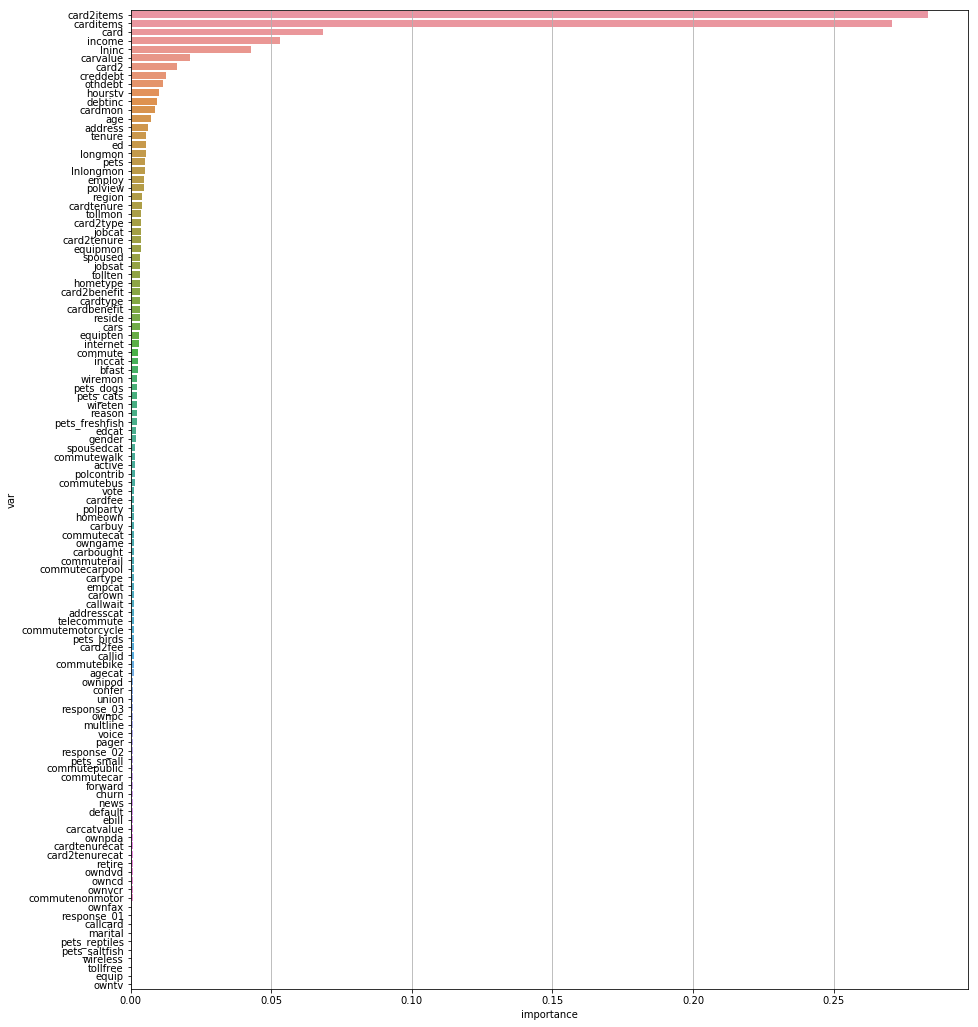

In [63]:
# Random Forest Feature Importance plot:-

%matplotlib inline
plt.rcParams["figure.figsize"]=15,18

sns.barplot(y="var",x="importance",data=feature_imp)

### Recurssive feature engg for var selection:-

In [64]:
from sklearn.feature_selection import RFE

In [66]:
rfe=RFE(rf_model,n_features_to_select=15).fit(train_x,train_y)

In [67]:
rfe

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [68]:
rfe.get_support

<bound method SelectorMixin.get_support of RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)>

In [69]:
import itertools

In [70]:
feature=pd.DataFrame([(x,y) for x,y in itertools.zip_longest(rfe.get_support(),train_x.columns)])

In [71]:
feature.columns=["res","var"]

In [72]:
feature[feature["res"]==True]

,res,var
3,True,age
12,True,card
13,True,card2
16,True,card2items
22,True,carditems
23,True,cardmon
30,True,carvalue
44,True,creddebt
45,True,debtinc
59,True,hourstv


In [71]:
col_rf

['carditems',
 'card',
 'card2items',
 'income',
 'lninc',
 'carvalue',
 'card2',
 'creddebt',
 'othdebt',
 'cardmon',
 'debtinc',
 'tenure',
 'age',
 'hourstv']

### Applying Linear Regression Model:-

In [72]:
import statsmodels.formula.api as smf

In [73]:
col_rf=["carditems","card","card2items","lninc","income","card2","age"]

In [74]:
final_features=col_rf

In [75]:
all_columns="+".join(final_features)

In [76]:
all_columns

'carditems+card+card2items+lninc+income+card2+age'

In [77]:
train,test=train_test_split(num_var,test_size=0.3,random_state=42)

In [78]:
model=smf.ols("Total_spend~" + all_columns,train).fit()

In [79]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_spend   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     899.7
Date:                Fri, 10 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:04:57   Log-Likelihood:                -1633.8
No. Observations:                3500   AIC:                             3284.
Df Residuals:                    3492   BIC:                             3333.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1891      0.073     57.589      0.0

In [80]:
model1=smf.ols("Total_spend~" + all_columns,test).fit()

In [81]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_spend   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     374.2
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          5.93e-323
Time:                        12:04:57   Log-Likelihood:                -701.46
No. Observations:                1500   AIC:                             1419.
Df Residuals:                    1492   BIC:                             1461.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2806      0.114     37.468      0.0

In [82]:
train["predicted_spend"]=model.predict()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
test["predicted_spend"]=model1.predict()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
from sklearn import metrics

In [85]:
print ("MAE:",metrics.mean_absolute_error(np.exp(train.Total_spend),np.exp(train["predicted_spend"])))
print ("MSE:",metrics.mean_squared_error(np.exp(train.Total_spend),np.exp(train["predicted_spend"])))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(np.exp(train.Total_spend),np.exp(train["predicted_spend"]))))

MAE: 151.8435275123559
MSE: 52195.11975151919
RMSE: 228.46251279262248


In [86]:
print ("MAE:",metrics.mean_absolute_error(np.exp(test.Total_spend),np.exp(test["predicted_spend"])))
print ("MSE:",metrics.mean_squared_error(np.exp(test.Total_spend),np.exp(test["predicted_spend"])))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(np.exp(test.Total_spend),np.exp(test["predicted_spend"]))))

MAE: 152.9415622496819
MSE: 56236.508896342835
RMSE: 237.1423810632398


### RMSE is increased from 228.46 to 237.14

## Applying Random Forest Technique for prediction:-


In [87]:
rf=RandomForestRegressor(n_estimators=100,oob_score=True).fit(train_x,train_y)

In [88]:
rf_train_pred=pd.DataFrame({"Actual":np.exp(train_y),"Predicted":np.exp(rf.predict(train_x))})

In [89]:
rf_train_pred.head()

,Actual,Predicted
1840,313.34,287.894456
2115,764.01,749.191652
4437,443.09,438.206520
1146,172.83,184.882454
2486,220.63,266.957903


In [90]:
rf_test=RandomForestRegressor(n_estimators=100,oob_score=True).fit(test_x,test_y)

In [91]:
rf_test_pred=pd.DataFrame(({"Actual":np.exp(test_y),"Predicted":np.exp(rf.predict(test_x))}))

In [92]:
rf_test_pred.head()

,Actual,Predicted
1501,248.81,196.131208
2586,391.98,409.891039
2653,119.53,110.035305
1055,723.45,625.255116
705,427.45,580.779932


In [93]:
print ("MAE:",metrics.mean_absolute_error(rf_train_pred.Actual,rf_train_pred.Predicted))
print ("MSE:",metrics.mean_squared_error(rf_train_pred.Actual,rf_train_pred.Predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(rf_train_pred.Actual,rf_train_pred.Predicted)))

MAE: 57.40061930077483
MSE: 9269.99734101285
RMSE: 96.28082540679037


In [94]:
print ("MAE:",metrics.mean_absolute_error(rf_test_pred.Actual,rf_test_pred.Predicted))
print ("MSE:",metrics.mean_squared_error(rf_test_pred.Actual,rf_test_pred.Predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(rf_test_pred.Actual,rf_test_pred.Predicted)))

MAE: 147.92653918358852
MSE: 52186.73102035765
RMSE: 228.44415295725486


In [95]:
# fine tunning the parameters:-

In [96]:
from sklearn.grid_search import GridSearchCV

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [97]:
param_grid={"n_estimators":[100,200,300]}

In [98]:
gs_model=GridSearchCV(RandomForestRegressor(),param_grid,cv=5).fit(train_x,train_y)

In [99]:
gs_model.best_params_

{'n_estimators': 300}

In [100]:
gs_model.best_score_

0.67401480683367

In [101]:
rf_final_train=RandomForestRegressor(n_estimators=300,oob_score=True).fit(train_x,train_y)

In [102]:
train_rf_pred=pd.DataFrame(({"Actual":np.exp(train_y),"Predicted":np.exp(rf_final_train.predict(train_x))}))

In [103]:
train_rf_pred.head()

,Actual,Predicted
1840,313.34,292.411747
2115,764.01,751.941667
4437,443.09,429.791692
1146,172.83,191.390631
2486,220.63,268.816204


In [104]:
rf_final_test=RandomForestRegressor(n_estimators=300,oob_score=True).fit(test_x,test_y)

In [105]:
rf_test_pred=pd.DataFrame(({"Actual":np.exp(test_y),"Predicted":np.exp(rf_final_test.predict(test_x))}))

In [106]:
rf_test_pred.head()

,Actual,Predicted
1501,248.81,215.823820
2586,391.98,417.695464
2653,119.53,120.778110
1055,723.45,672.803553
705,427.45,462.508593


In [107]:
print ("MAE:",metrics.mean_absolute_error(train_rf_pred.Actual,train_rf_pred.Predicted))
print ("MSE:",metrics.mean_squared_error(train_rf_pred.Actual,train_rf_pred.Predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(train_rf_pred.Actual,train_rf_pred.Predicted)))

MAE: 56.802388235083725
MSE: 8882.014302130277
RMSE: 94.24443910454492


In [108]:
print ("MAE:",metrics.mean_absolute_error(rf_test_pred.Actual,rf_test_pred.Predicted))
print ("MSE:",metrics.mean_squared_error(rf_test_pred.Actual,rf_test_pred.Predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(rf_test_pred.Actual,rf_test_pred.Predicted)))

MAE: 58.585117034805656
MSE: 9787.26530742572
RMSE: 98.93060854672693


## Applying Decision tree model:-

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt_model=DecisionTreeRegressor(max_depth=3,max_features=10)

In [111]:
dt_train=dt_model.fit(train_x,train_y)

In [112]:
pred_train=pd.DataFrame({"Actual":train_y,"Predicted":dt_train.predict(train_x)})

In [113]:
pred_train.head()

,Actual,Predicted
1840,5.747289,6.018570
2115,6.638581,6.493557
4437,6.093773,6.018570
1146,5.152308,5.445876
2486,5.396487,6.018570


In [117]:
dt_test=dt_model.fit(test_x,test_y)

In [120]:
pred_test=pd.DataFrame({"Actual":test_y,"Predicted":dt_train.predict(test_x)})

In [123]:
print ("MAE:",metrics.mean_absolute_error(pred_train.Actual,pred_train.Predicted)*100)
print ("MSE:",metrics.mean_squared_error(pred_train.Actual,pred_train.Predicted)*100)
print ("RMSE:",np.sqrt(metrics.mean_squared_error(pred_train.Actual,pred_train.Predicted))*100)

MAE: 42.839635733942345
MSE: 29.46398762383156
RMSE: 54.28074025271907


In [122]:
print ("MAE:",metrics.mean_absolute_error(pred_test.Actual,pred_test.Predicted)*100)
print ("MSE:",metrics.mean_squared_error(pred_test.Actual,pred_test.Predicted)*100)
print ("RMSE:",np.sqrt(metrics.mean_squared_error(pred_test.Actual,pred_test.Predicted))*100)

MAE: 45.246967345688184
MSE: 32.41807228718312
RMSE: 56.93687055606684
